<a href="https://colab.research.google.com/github/seohyun126/LG-Aimers-6th/blob/main/Aimers_%EC%A0%84%EC%B2%98%EB%A6%AC_1%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **0 데이터 확인**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train=pd.read_csv('/content/drive/MyDrive/Aimers_data/train.csv').drop(columns=['ID'])
test=pd.read_csv("/content/drive/MyDrive/Aimers_data/test.csv").drop(columns=['ID'])
submission=pd.read_csv("/content/drive/MyDrive/Aimers_data/sample_submission.csv")

In [ ]:
train.shape

(256351, 68)

In [ ]:
train[train['시술 당시 나이']=='알 수 없음'].shape

(329, 68)

In [ ]:
train_notage=train[train['시술 당시 나이']=='알 수 없음']

In [ ]:
train_notage['임신 성공 여부'].mean()

0.0

In [ ]:
train.groupby('시술 당시 나이')['임신 성공 여부'].mean()

,임신 성공 여부
시술 당시 나이,
만18-34세,0.322622
만35-37세,0.278401
만38-39세,0.217138
만40-42세,0.159393
만43-44세,0.118012
만45-50세,0.167679
알 수 없음,0.000000


In [ ]:
train['난자 출처'].value_counts()

,count
난자 출처,
본인 제공,234291
기증 제공,15769
알 수 없음,6291


In [ ]:
train['대리모 여부'].mean()

0.004194993201631608

In [ ]:
train[train['시술 당시 나이']=='만45-50세']['대리모 여부'].mean()

0.008713942307692308

In [ ]:
train[train['시술 당시 나이']=='만45-50세']

In [ ]:
train[train['난자 출처']=='본인 제공'].groupby('시술 당시 나이')['임신 성공 여부'].mean()

,임신 성공 여부
시술 당시 나이,
만18-34세,0.325815
만35-37세,0.280439
만38-39세,0.215694
만40-42세,0.145823
만43-44세,0.064107
만45-50세,0.028216
알 수 없음,0.000000


- 난자 출처가 본인 제공일 경우, 나이에 따라서 임신 성공 비율이 감소하는 형태임
- 알 수 없음 일 경우 0

In [ ]:
train_age2=train[(train['난자 출처']=='본인 제공')&(train['시술 당시 나이']!='알 수 없음')][['시술 당시 나이','임신 성공 여부']]
train_age2.shape

(233962, 2)

In [ ]:
train_age2['시술 당시 나이'].value_counts()

,count
시술 당시 나이,
만18-34세,97534
만35-37세,54461
만38-39세,36575
만40-42세,33040
만43-44세,9375
만45-50세,2977


In [ ]:
train_age2.loc[train_age2['시술 당시 나이']=='만45-50세','시술 당시 나이']=47.5
train_age2.loc[train_age2['시술 당시 나이']=='만43-44세','시술 당시 나이']=43.5
train_age2.loc[train_age2['시술 당시 나이']=='만40-42세','시술 당시 나이']=41
train_age2.loc[train_age2['시술 당시 나이']=='만38-39세','시술 당시 나이']=37
train_age2.loc[train_age2['시술 당시 나이']=='만35-37세','시술 당시 나이']=36
train_age2.loc[train_age2['시술 당시 나이']=='만18-34세','시술 당시 나이']=30

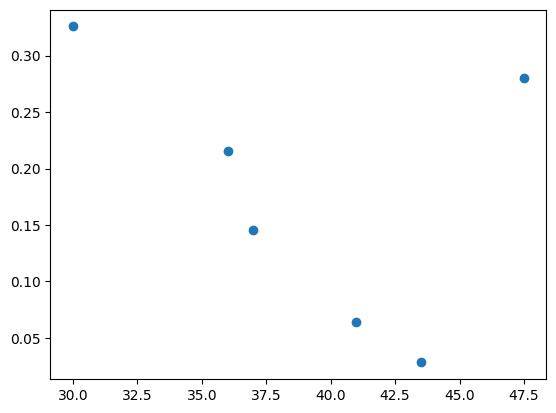

In [ ]:
plt.scatter(train_age2['시술 당시 나이'].unique(),train_age2.groupby('시술 당시 나이')['임신 성공 여부'].mean())

In [ ]:
train_age2.corr()

,시술 당시 나이,임신 성공 여부
시술 당시 나이,1.000000,-0.172093
임신 성공 여부,-0.172093,1.000000


원래라면, -0.18 정도의 correlation을 가져야 함 -> 이에 맞게 난자 출처가 기증제공인 경우 난자 기증자 나이와 시술 당시 나이를 가중합 한 보정된 나이 column을 만들어 임신 성공여부와 correlation이 저정도 되도록

In [ ]:
train[train['시술 당시 나이']=='만45-50세']['난자 출처'].value_counts()

,count
난자 출처,
기증 제공,3679
본인 제공,2977
알 수 없음,262


In [ ]:
train[(train['시술 당시 나이']=='만45-50세') & (train['난자 출처']=='기증 제공')]['난자 기증자 나이'].value_counts()

,count
난자 기증자 나이,
만31-35세,1487
만26-30세,1159
만21-25세,675
알 수 없음,268
만20세 이하,90


나이가 있으면, 난자 출처가 기증제공인 경우가 있어 train 전체 데이터에선 임신 성공 비율이 시술 당시 나이에 따라 감소하지 않음

In [ ]:
train[(train['시술 당시 나이']=='만43-44세') & (train['난자 출처']=='기증 제공')]['난자 기증자 나이'].value_counts()

,count
난자 기증자 나이,
만31-35세,940
만26-30세,859
만21-25세,403
알 수 없음,211
만20세 이하,46


예를 들어 시술 당시 나이가 만 43-44세, 난자 출처가 기증 제공일 경우, 난자 기증자 나이 대부분이 시술 당시 나이보다 훨씬 어림

In [ ]:
train_age=train[(train['시술 당시 나이']!='알 수 없음')&(train['난자 출처']=='기증 제공')][['시술 당시 나이','난자 출처','난자 기증자 나이','임신 성공 여부']]

In [ ]:
train_age.isna().sum()

,0
시술 당시 나이,0
난자 출처,0
난자 기증자 나이,0
임신 성공 여부,0


In [ ]:
train_age['시술 당시 나이'].value_counts()

,count
시술 당시 나이,
만45-50세,3679
만40-42세,3272
만18-34세,2871
만43-44세,2459
만35-37세,1869
만38-39세,1619


In [ ]:
train_age.loc[train_age['시술 당시 나이']=='만45-50세','시술 당시 나이']=47.5
train_age.loc[train_age['시술 당시 나이']=='만43-44세','시술 당시 나이']=43.5
train_age.loc[train_age['시술 당시 나이']=='만40-42세','시술 당시 나이']=41
train_age.loc[train_age['시술 당시 나이']=='만38-39세','시술 당시 나이']=38.5
train_age.loc[train_age['시술 당시 나이']=='만35-37세','시술 당시 나이']=36
train_age.loc[train_age['시술 당시 나이']=='만18-34세','시술 당시 나이']=26

In [ ]:
train_age['시술 당시 나이']=train_age['시술 당시 나이'].astype('float')

In [ ]:
train_age['난자 기증자 나이'].value_counts()

,count
난자 기증자 나이,
만31-35세,6366
만26-30세,4976
만21-25세,2334
알 수 없음,1799
만20세 이하,294


In [ ]:
train_age=train_age[train_age['난자 기증자 나이']!='알 수 없음']

In [ ]:
train_age.loc[train_age['난자 기증자 나이']=='만21-25세','난자 기증자 나이']=23
train_age.loc[train_age['난자 기증자 나이']=='만20세 이하','난자 기증자 나이']=18
train_age.loc[train_age['난자 기증자 나이']=='만26-30세','난자 기증자 나이']=28
train_age.loc[train_age['난자 기증자 나이']=='만31-35세','난자 기증자 나이']=33

In [ ]:
train_age['난자 기증자 나이']=train_age['난자 기증자 나이'].astype('float')
train_age['난자 기증자 나이'].value_counts()

,count
난자 기증자 나이,
33.0,6366
28.0,4976
23.0,2334
18.0,294


In [ ]:
train_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13970 entries, 6 to 256334
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시술 당시 나이   13970 non-null  float64
 1   난자 출처      13970 non-null  object 
 2   난자 기증자 나이  13970 non-null  float64
 3   임신 성공 여부   13970 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 545.7+ KB


In [ ]:
train_age[['시술 당시 나이','난자 기증자 나이']]

,시술 당시 나이,난자 기증자 나이
6,26.0,23.0
22,41.0,23.0
40,26.0,33.0
79,47.5,28.0
100,26.0,28.0
...,...,...
256295,43.5,23.0
256306,38.5,28.0
256315,47.5,28.0
256329,38.5,33.0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X=train_age[['시술 당시 나이','난자 기증자 나이']]
y=train_age['임신 성공 여부']
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=0)
model=LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
f1_score(y_test,y_pred)

0.42281327118179324

In [ ]:
y_test.sum()

1357

In [ ]:
y_pred.sum()

2290

In [ ]:
model.coef_

array([[-0.00134893, -0.01076621]])

In [ ]:
0.001/0.011

0.09090909090909091

In [ ]:
model.intercept_

array([0.36799088])

In [ ]:
train_age[['보정된 나이','시술 당시 나이','난자 기증자 나이','임신 성공 여부']].corr()

,보정된 나이,시술 당시 나이,난자 기증자 나이,임신 성공 여부
보정된 나이,1.000000,0.110100,0.984389,-0.019419
시술 당시 나이,0.110100,1.000000,-0.066554,-0.006862
난자 기증자 나이,0.984389,-0.066554,1.000000,-0.018279
임신 성공 여부,-0.019419,-0.006862,-0.018279,1.000000


In [ ]:
train_age['보정된 나이']=train_age['시술 당시 나이']*0.09+train_age['난자 기증자 나이']*0.91

In [ ]:
train_age.groupby('보정된 나이')['임신 성공 여부'].mean().sort_values(ascending=False)

,임신 성공 여부
보정된 나이,
29.395,0.370198
24.845,0.362283
28.945,0.360721
29.170,0.353516
24.170,0.350230
27.820,0.344639
28.720,0.341651
24.620,0.339216
24.395,0.336449


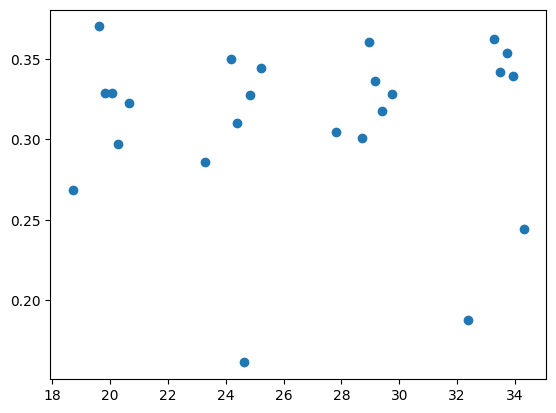

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_age['보정된 나이'].unique(),train_age.groupby('보정된 나이')['임신 성공 여부'].mean())

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
y_pred[y_pred>0.5]

array([], dtype=float64)

In [ ]:
train_age.groupby('보정된 나이')['임신 성공 여부'].mean()

,임신 성공 여부
보정된 나이,
20.000,0.285714
22.500,0.161290
23.125,0.187500
23.750,0.319372
24.375,0.304348
25.375,0.244444
26.250,0.350230
26.875,0.336449
27.500,0.342697


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [ ]:
train_age.shape

(13970, 4)

In [ ]:
train_age['임신 성공 여부'].mean()

0.32376521116678597

In [ ]:
# 특성과 타겟 변수 설정
X = train_age[['난자 기증자 나이','시술 당시 나이']]  # 시술 당시 나이와 난자 생성 나이
y = train_age['임신 성공 여부'].astype(int)  # 임신 성공 여부

# 데이터 나누기 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.35, random_state=42)

# 로지스틱 회귀 모델 훈련
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
# 예측
y_pred = model.predict(X_test)

In [ ]:
y_pred.sum()

2652

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1528, 1779],
       [ 710,  873]])

In [ ]:
model.coef_

array([[-0.01232917, -0.00491417]])

In [ ]:
f1_score(y_test, y_pred)

0.41227863046044866

In [ ]:
pd.DataFrame(train_notage.isna().sum()[train_notage.isna().sum() > 0])

,0
임신 시도 또는 마지막 임신 경과 연수,329
착상 전 유전 검사 사용 여부,329
PGD 시술 여부,329
PGS 시술 여부,329
난자 채취 경과일,2
난자 해동 경과일,328
난자 혼합 경과일,301
배아 이식 경과일,329
배아 해동 경과일,328


In [ ]:
train_notage['난자 출처'].value_counts()

,count
난자 출처,
본인 제공,329


In [ ]:
train_notage['난자 출처'].value_counts()

In [ ]:
train_notage['난자 기증자 나이'].value_counts()

,count
난자 기증자 나이,
알 수 없음,329


In [ ]:
train[train['난자 출처']=='기증 제공']['난자 기증자 나이'].value_counts()

,count
난자 기증자 나이,
만31-35세,6366
만26-30세,4976
만21-25세,2334
알 수 없음,1799
만20세 이하,294


In [ ]:
train[train['난자 출처']=='본인 제공']['난자 기증자 나이'].value_counts()

,count
난자 기증자 나이,
알 수 없음,234291


In [ ]:
train[train['난자 출처']=='본인 제공']['시술 당시 나이'].value_counts()

,count
시술 당시 나이,
만18-34세,97534
만35-37세,54461
만38-39세,36575
만40-42세,33040
만43-44세,9375
만45-50세,2977
알 수 없음,329


In [ ]:
train[train['난자 출처']=='본인 제공']['난자 기증자 나이'].value_counts()

,count
난자 기증자 나이,
알 수 없음,234291


In [ ]:
train[train['난자 출처']=='본인 제공'][['난자 기증자 나이','시술 당시 나이']]

,난자 기증자 나이,시술 당시 나이
0,알 수 없음,만18-34세
1,알 수 없음,만45-50세
2,알 수 없음,만18-34세
3,알 수 없음,만35-37세
4,알 수 없음,만18-34세
...,...,...
256346,알 수 없음,만18-34세
256347,알 수 없음,만38-39세
256348,알 수 없음,만35-37세
256349,알 수 없음,만38-39세


In [ ]:
train_notage.describe()

,임신 시도 또는 마지막 임신 경과 연수,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
count,0.0,329.000000,329.0,0.0,329.0,329.0,329.0,329.0,329.0,329.0,...,329.0,329.000000,0.0,0.0,327.0,1.0,28.0,0.0,1.0,329.0
mean,NaN,0.981763,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.015198,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0
std,NaN,0.134011,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.122524,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.000000,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0
25%,NaN,1.000000,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0
50%,NaN,1.000000,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0
75%,NaN,1.000000,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0
max,NaN,1.000000,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0


In [ ]:
train['난자 기증자 나이'].value_counts()

,count
난자 기증자 나이,
알 수 없음,242381
만31-35세,6366
만26-30세,4976
만21-25세,2334
만20세 이하,294


In [ ]:
test.shape

(90067, 67)

In [ ]:
train.shape[0]

256351

## **1 결측치 확인**

In [ ]:
pd.DataFrame(train.isna().sum()[train.isna().sum() > 0])

,0
임신 시도 또는 마지막 임신 경과 연수,246981
특정 시술 유형,2
단일 배아 이식 여부,6291
착상 전 유전 검사 사용 여부,253633
착상 전 유전 진단 사용 여부,6291
배아 생성 주요 이유,6291
총 생성 배아 수,6291
미세주입된 난자 수,6291
미세주입에서 생성된 배아 수,6291
이식된 배아 수,6291


In [ ]:
pd.DataFrame(test.isna().sum()[test.isna().sum() > 0])

,0
임신 시도 또는 마지막 임신 경과 연수,86770
단일 배아 이식 여부,2176
착상 전 유전 검사 사용 여부,89134
착상 전 유전 진단 사용 여부,2176
배아 생성 주요 이유,2176
총 생성 배아 수,2176
미세주입된 난자 수,2176
미세주입에서 생성된 배아 수,2176
이식된 배아 수,2176
미세주입 배아 이식 수,2176


#### **너무 NaN이 많은 컬럼 제외**
**[['임신 시도 또는 마지막 임신 경과 연수','착상 전 유전 검사 사용 여부','난자 해동 경과일','배아 해동 경과일']**


In [ ]:
# 너무 NaN이 많은 컬럼 제외
train.drop(['임신 시도 또는 마지막 임신 경과 연수','착상 전 유전 검사 사용 여부','난자 해동 경과일','배아 해동 경과일'],axis=1,inplace=True)
test.drop(['임신 시도 또는 마지막 임신 경과 연수','착상 전 유전 검사 사용 여부','난자 해동 경과일','배아 해동 경과일'],axis=1,inplace=True)

#### **수/ 여부 가 들어간 column 중 nan 값을 0으로 채움**


In [ ]:
# 수/ 여부 가 들어간 column 중 nan 값을 0으로 채움
train.loc[:, train.columns.str.contains("수|여부")] = train.loc[:, train.columns.str.contains("수|여부")].fillna(0)
test.loc[:, test.columns.str.contains("수|여부")] = test.loc[:, test.columns.str.contains("수|여부")].fillna(0)

In [ ]:
pd.DataFrame(train.isna().sum()[train.isna().sum() > 0])

,0
특정 시술 유형,2
배아 생성 주요 이유,6291
난자 채취 경과일,57488
난자 혼합 경과일,53735
배아 이식 경과일,43566


In [ ]:
pd.DataFrame(test.isna().sum()[test.isna().sum() > 0])

,0
배아 생성 주요 이유,2176
난자 채취 경과일,19949
난자 혼합 경과일,18579
배아 이식 경과일,15246


#### **특정 시술 유형이 NaN인 row 제거**
- train에만 있었음

In [ ]:
# train에서 특정 시술 유형이 NaN인 것 제외
train = train.dropna(subset=["특정 시술 유형"])

In [ ]:
pd.DataFrame(train.isna().sum()[train.isna().sum() > 0])

,0
배아 생성 주요 이유,6291
난자 채취 경과일,57488
난자 혼합 경과일,53735
배아 이식 경과일,43564


#### **난자 채취 경과일, 난자 혼합 경과일 -> 0 아니면 NaN 값임 -> 제외**

In [ ]:
# 난자 채취 경과일, 난자 혼합 경과일의 경우 csv 를 확인해보니 0 아니면 NaN 값임 -> 제외시키기
train.drop(['난자 채취 경과일','난자 혼합 경과일'],inplace=True, axis=1)
test.drop(['난자 채취 경과일','난자 혼합 경과일'],inplace=True, axis=1)

In [ ]:
pd.DataFrame(train.isna().sum()[train.isna().sum() > 0])

,0
배아 생성 주요 이유,6291
배아 이식 경과일,43564


In [ ]:
pd.DataFrame(test.isna().sum()[train.isna().sum() > 0])

,0
배아 생성 주요 이유,2176
배아 이식 경과일,15246


In [ ]:
train['시술 유형'].value_counts()

,count
시술 유형,
IVF,250058
DI,6291


## **2 Preprocessing**

#### **시술 유형이 IVF면 1, DI면 0으로**

In [ ]:
# 시술 유형이 IVF면 1, DI면 0으로
train.loc[train['시술 유형']=='IVF','시술 유형']=1
train.loc[train['시술 유형']=='DI','시술 유형']=0

In [ ]:
test.loc[test['시술 유형']=='IVF','시술 유형']=1
test.loc[test['시술 유형']=='DI','시술 유형']=0

In [ ]:
train['시술 유형']=train['시술 유형'].astype(int)
test['시술 유형']=test['시술 유형'].astype(int)

In [ ]:
train.select_dtypes(include=['object']).columns

Index(['시술 시기 코드', '시술 당시 나이', '특정 시술 유형', '배란 유도 유형', '배아 생성 주요 이유',
       '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수',
       'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '난자 출처',
       '정자 출처', '난자 기증자 나이', '정자 기증자 나이'],
      dtype='object')

In [ ]:
train['시술 시기 코드'].value_counts()

,count
시술 시기 코드,
TRDQAZ,38969
TRCMWS,38090
TRYBLT,36713
TRVNRY,36172
TRJXFG,36030
TRZKPL,35544
TRXQMD,34831


In [ ]:
train.groupby('시술 시기 코드')['임신 성공 여부'].mean()

,임신 성공 여부
시술 시기 코드,
TRCMWS,0.257417
TRDQAZ,0.245426
TRJXFG,0.266278
TRVNRY,0.259787
TRXQMD,0.256122
TRYBLT,0.269087
TRZKPL,0.255120


In [ ]:
test['시술 시기 코드'].value_counts()

,count
시술 시기 코드,
TRDQAZ,13610
TRCMWS,13392
TRYBLT,12929
TRZKPL,12793
TRJXFG,12764
TRVNRY,12560
TRXQMD,12019


#### **시술 시기 코드 제외**
시술 시기 코드의 경우 적절히 분배되어 있고, 시술 시기 코드 별 임신 성공 여부에 큰 차이가 없음

따라서 해당 열을 제외

In [ ]:
train.drop('시술 시기 코드',axis=1,inplace=True)
test.drop('시술 시기 코드',axis=1,inplace=True)

In [ ]:
# 따라서 배란 유도 유형 drop -> 의미 있는 값이 2개 밖에 없음
train.drop('배란 유도 유형', inplace=True, axis=1)
test.drop('배란 유도 유형', inplace=True, axis=1)

In [ ]:
train['특정 시술 유형'].value_counts()

,count
특정 시술 유형,
ICSI,122368
IVF,91755
Unknown,26939
IUI,6100
ICSI:ICSI,2314
ICSI / BLASTOCYST,1609
IVF / BLASTOCYST,1248
IVF:IVF,1146
ICSI:IVF,873


#### **특정 시술 유형 카테고리 단순화**

In [ ]:
# 너무 카테고리가 많음
# 주요 그룹으로 단순화하기 - 카테고리 갯수 줄이기
def simplify_treatment_type(x):
    if "ICSI" in x:
        return "ICSI"
    elif "IVF" in x:
        return "IVF"
    elif "IUI" in x:
        return "IUI"
    elif "FER" in x:
        return "FER"
    elif "GIFT" in x:
        return "GIFT"
    elif "ICI" in x:
        return "ICI"
    elif "DI" in x:
        return "DI"
    else:
        return "Unknown"

train['특정 시술 유형'] = train['특정 시술 유형'].apply(simplify_treatment_type)

In [ ]:
train['특정 시술 유형'].value_counts()

,count
특정 시술 유형,
ICSI,128547
IVF,94568
Unknown,26962
IUI,6100
ICI,96
DI,71
FER,3
GIFT,2


In [ ]:
test['특정 시술 유형'] = test['특정 시술 유형'].apply(simplify_treatment_type)

In [ ]:
test['특정 시술 유형'].value_counts()

,count
특정 시술 유형,
ICSI,45383
IVF,33292
Unknown,9224
IUI,2114
ICI,28
DI,26


In [ ]:
train.groupby('특정 시술 유형')['임신 성공 여부'].mean()

,임신 성공 여부
특정 시술 유형,
DI,0.169014
FER,0.333333
GIFT,0.000000
ICI,0.135417
ICSI,0.268314
IUI,0.128525
IVF,0.259443
Unknown,0.237074


#### **특정 시술 유형 -> DI, GIFT drop**
- test에 없음

In [ ]:
# DI (기증 정자 주입)은 성공 여부가 0
# 하지만 test 데이터에는 해당 데이터가 없음
# 그럼 DI가 있는 row를 드롭할까?
train = train[train['특정 시술 유형'] != 'DI']

#### **배아 생성 주요 이유 -> 현재 시술용 or not으로**

In [ ]:
train['배아 생성 주요 이유'].value_counts()

,count
배아 생성 주요 이유,
현재 시술용,233730
배아 저장용,9192
"기증용, 현재 시술용",3784
난자 저장용,1959
기증용,1108
"기증용, 배아 저장용",125
"배아 저장용, 현재 시술용",83
"기증용, 난자 저장용",44
"기증용, 배아 저장용, 현재 시술용",20


In [ ]:
test['배아 생성 주요 이유'].value_counts()

,count
배아 생성 주요 이유,
현재 시술용,82253
배아 저장용,3151
"기증용, 현재 시술용",1327
난자 저장용,664
기증용,384
"기증용, 배아 저장용",47
"배아 저장용, 현재 시술용",38
"기증용, 난자 저장용",19
"기증용, 배아 저장용, 현재 시술용",6


In [ ]:
train[train['배아 생성 주요 이유'].str.contains('현재 시술용',na=False)].shape

(237623, 60)

In [ ]:
train.groupby('배아 생성 주요 이유')['임신 성공 여부'].mean()

,임신 성공 여부
배아 생성 주요 이유,
기증용,0.000000
"기증용, 난자 저장용",0.000000
"기증용, 배아 저장용",0.000000
"기증용, 배아 저장용, 현재 시술용",0.350000
"기증용, 현재 시술용",0.379757
난자 저장용,0.000000
"난자 저장용, 배아 저장용",0.000000
"난자 저장용, 배아 저장용, 연구용",0.000000
"난자 저장용, 현재 시술용",0.200000


In [ ]:
train[train['배아 생성 주요 이유'].isna()]['임신 성공 여부'].mean()

0.1284565916398714

현재 시술 용만 배아 생성 주요 이유 = 1 을 할지, 아니면 현재 시술 용이 포함된 걸 모두 배아 생성 주요 이유 = 0 을 할지 고민했는데 (아닌 건 0으로)

배아 생성 주요 이유에 현재 시술용이 포함되어 있는 것과 아닌 것에 임신 성공 여부 차이가 많이 남

또한 배아 생성 주요 이유가 NaN 값인 건 그 중간 정도 임신 성공 여부 평균값을 가짐

나중에 scaling을 한다고 했을 때 모든 값들이 0~1 사이, 또는 -1~1 사이의 값들이어야 하므로

배아 생성 주요 이유에 현재 시술용이 포함되면 1, 아니면 0, NaN이면 0.5 부여

In [ ]:
train[train['배아 생성 주요 이유'].isna()].shape

(6220, 60)

In [ ]:
train['현재 시술용 여부']=0.0
train.loc[train['배아 생성 주요 이유'].isna(),'현재 시술용 여부']=0.5

In [ ]:
train['현재 시술용 여부'].value_counts()

,count
현재 시술용 여부,
0.0,250058
0.5,6220


In [ ]:
train.loc[train['배아 생성 주요 이유'].str.contains('현재 시술용',na=False),'현재 시술용 여부']=1

In [ ]:
train.drop('배아 생성 주요 이유',inplace=True,axis=1)
train['현재 시술용 여부'].value_counts()

,count
현재 시술용 여부,
1.0,237623
0.0,12435
0.5,6220


In [ ]:
test['현재 시술용 여부']=0.0
test.loc[test['배아 생성 주요 이유'].isna(),'현재 시술용 여부']=0.5
test.loc[test['배아 생성 주요 이유'].str.contains('현재 시술용',na=False),'현재 시술용 여부']=1

In [ ]:
test.drop('배아 생성 주요 이유',inplace=True,axis=1)
test['현재 시술용 여부'].value_counts()

,count
현재 시술용 여부,
1.0,83625
0.0,4266
0.5,2176


#### **총 시술 횟수 숫자형으로**

In [ ]:
train.groupby('총 시술 횟수')['임신 성공 여부'].mean()

,임신 성공 여부
총 시술 횟수,
0회,0.291018
1회,0.249969
2회,0.244190
3회,0.236400
4회,0.227765
5회,0.215753
6회 이상,0.203374


In [ ]:
# 상관관계 분석을 위해 일단 숫자형으로 바꾸기
train['총 시술 횟수'] = train['총 시술 횟수'].str.extract('(\d+)').astype(int)

In [ ]:
test['총 시술 횟수'] = test['총 시술 횟수'].str.extract('(\d+)').astype(int)

In [ ]:
train[['총 시술 횟수', '임신 성공 여부']].corr()

,총 시술 횟수,임신 성공 여부
총 시술 횟수,1.000000,-0.058927
임신 성공 여부,-0.058927,1.000000


In [ ]:
train[['총 시술 횟수', '임신 성공 여부']].corr(method='spearman')

,총 시술 횟수,임신 성공 여부
총 시술 횟수,1.000000,-0.062404
임신 성공 여부,-0.062404,1.000000


#### **클리닉 내 총 시술 횟수 숫자형으로**

In [ ]:
# 어느 정도 관계가 보이긴 함.. 냅두기
train.groupby('클리닉 내 총 시술 횟수')['임신 성공 여부'].mean()
# 마찬가지로 어느 정도 관계가 보이긴 함.. 냅두기 이때 숫자형으로 바꾸기
train['클리닉 내 총 시술 횟수'] = train['클리닉 내 총 시술 횟수'].str.extract('(\d+)').astype(int)

In [ ]:
test['클리닉 내 총 시술 횟수']=test['클리닉 내 총 시술 횟수'].str.extract(r'(\d+)').astype(int)

#### **IVF 시술 횟수 숫자형으로**

In [ ]:
train.groupby('IVF 시술 횟수')['임신 성공 여부'].mean()

,임신 성공 여부
IVF 시술 횟수,
0회,0.286347
1회,0.250553
2회,0.245456
3회,0.235524
4회,0.227452
5회,0.212793
6회 이상,0.196082


In [ ]:
# 어느 정도 선형적이 관계를 보이긴 함.. 숫자형으로만 바꾸기
train['IVF 시술 횟수']=train['IVF 시술 횟수'].str.extract(r'(\d+)').astype(int)
test['IVF 시술 횟수']=test['IVF 시술 횟수'].str.extract(r'(\d+)').astype(int)

#### **DI 시술 횟수 숫자형으로**

In [ ]:
train.groupby('DI 시술 횟수')['임신 성공 여부'].mean()

,임신 성공 여부
DI 시술 횟수,
0회,0.260665
1회,0.191870
2회,0.217623
3회,0.242678
4회,0.219895
5회,0.188490
6회 이상,0.236801


In [ ]:
# 다른 변수들로 대체 가능할지.. 알아보기 위해 일단 숫자형으로 바꾸기
train['DI 시술 횟수']=train['DI 시술 횟수'].str.extract(r'(\d+)').astype(int)
test['DI 시술 횟수']=test['DI 시술 횟수'].str.extract(r'(\d+)').astype(int)

In [ ]:
train.groupby('DI 시술 횟수')['임신 성공 여부'].mean()

,임신 성공 여부
DI 시술 횟수,
0,0.260665
1,0.191870
2,0.217623
3,0.242678
4,0.219895
5,0.188490
6,0.236801


In [ ]:
num_cols=train.select_dtypes(exclude=['object']).columns
corr_values = train[num_cols].corr()['DI 시술 횟수']
# 0.9 이상 또는 -0.9 이하인 값만 필터링
corr_values[(corr_values >= 0.9) | (corr_values <= -0.9)]

,DI 시술 횟수
DI 시술 횟수,1.0


딱히 대체 가능한 column은 없어 보임

일단 두기.. scaling 어떻게 할지.. 나중에 고민하기 ~

In [ ]:
train['IVF 출산 횟수'].value_counts()

,count
IVF 출산 횟수,
0회,220759
1회,33347
2회,2021
3회,137
4회,13
5회,1


#### **IVF 출산 횟수 숫자형으로**

In [ ]:
train.groupby('IVF 출산 횟수')['임신 성공 여부'].mean()

,임신 성공 여부
IVF 출산 횟수,
0회,0.256574
1회,0.269889
2회,0.262741
3회,0.299270
4회,0.230769
5회,0.000000


In [ ]:
test['IVF 출산 횟수'].value_counts()

,count
IVF 출산 횟수,
0회,77480
1회,11874
2회,666
3회,42
4회,5


In [ ]:
train['IVF 출산 횟수']=train['IVF 출산 횟수'].str.extract(r'(\d+)').astype(int)
test['IVF 출산 횟수']=test['IVF 출산 횟수'].str.extract(r'(\d+)').astype(int)

In [ ]:
# IVF 출산 횟수가 5회 인건 test 데이터에 없음 -> 지우기
train=train[train['IVF 출산 횟수']!=5]

In [ ]:
train.groupby('IVF 출산 횟수')['임신 성공 여부'].mean()

,임신 성공 여부
IVF 출산 횟수,
0,0.256574
1,0.269889
2,0.262741
3,0.299270
4,0.230769


In [ ]:
num_cols=train.select_dtypes(exclude=['object']).columns
corr_values = train[num_cols].corr()['IVF 출산 횟수']
# 0.9 이상 또는 -0.9 이하인 값만 필터링
corr_values[(corr_values >= 0.9) | (corr_values <= -0.9)]

,IVF 출산 횟수
IVF 출산 횟수,1.0


#### **총 임신 횟수 숫자형으로**

In [ ]:
train.groupby('총 임신 횟수')['임신 성공 여부'].mean()

,임신 성공 여부
총 임신 횟수,
0회,0.257482
1회,0.262922
2회,0.258008
3회,0.245638
4회,0.215054
5회,0.285714
6회 이상,0.333333


In [ ]:
test.value_counts('총 임신 횟수')

,count
총 임신 횟수,
0회,72216
1회,15386
2회,2127
3회,297
4회,37
5회,3
6회 이상,1


In [ ]:
train['총 임신 횟수']=train['총 임신 횟수'].str.extract(r'(\d+)').astype(int)
test['총 임신 횟수']=test['총 임신 횟수'].str.extract(r'(\d+)').astype(int)

In [ ]:
train[['총 임신 횟수','임신 성공 여부']].corr()

,총 임신 횟수,임신 성공 여부
총 임신 횟수,1.000000,0.002723
임신 성공 여부,0.002723,1.000000


#### **IVF 임신 횟수 숫자형으로**

In [ ]:
train['IVF 임신 횟수'].value_counts()

,count
IVF 임신 횟수,
0회,208220
1회,41518
2회,5788
3회,663
4회,81
5회,6
6회 이상,1


In [ ]:
test['IVF 임신 횟수'].value_counts()

,count
IVF 임신 횟수,
0회,73207
1회,14571
2회,1981
3회,274
4회,31
5회,3


In [ ]:
train['IVF 임신 횟수'] = train['IVF 임신 횟수'].str.extract('(\d+)').astype(int)
test['IVF 임신 횟수'] = test['IVF 임신 횟수'].str.extract('(\d+)').astype(int)

In [ ]:
# train에서만 임신 횟수가 6회 이상이 한개 나옴 -> 제거하기
train=train[train['IVF 임신 횟수']!=6]

In [ ]:
train.groupby('IVF 임신 횟수')['임신 성공 여부'].mean()
# 5회에서 급격히 떨어지는 걸 볼 수 있음

,임신 성공 여부
IVF 임신 횟수,
0,0.256882
1,0.266415
2,0.256047
3,0.247360
4,0.234568
5,0.166667


In [ ]:
test['DI 임신 횟수'].value_counts()

,count
DI 임신 횟수,
0회,89008
1회,929
2회,117
3회,10
4회,2
5회,1


#### **DI 임신 횟수 숫자형으로**

In [ ]:
train['DI 임신 횟수'] = train['DI 임신 횟수'].str.extract('(\d+)').astype(int)
test['DI 임신 횟수'] = test['DI 임신 횟수'].str.extract('(\d+)').astype(int)

In [ ]:
train.groupby('DI 임신 횟수')['임신 성공 여부'].mean()
# 4회에서 임신 성공 여부가 모두 0이 되는 특이점..(row는 5개 존재함)

,임신 성공 여부
DI 임신 횟수,
0,0.258870
1,0.209098
2,0.275956
3,0.212766
4,0.000000
5,0.333333


#### **총 출산 횟수 숫자형으로**

In [ ]:
train.groupby('총 출산 횟수')['임신 성공 여부'].mean()
# 6회 이상 값이 0이 됨 (row 는 2개)
# test 에서 총 출산 횟수가 6회 이상 -> 임신 성공 여부를 0으로 나중에 고치기

,임신 성공 여부
총 출산 횟수,
0회,0.256875
1회,0.267266
2회,0.263275
3회,0.275449
4회,0.230769
6회 이상,0.000000


In [ ]:
test['총 출산 횟수'].value_counts()

,count
총 출산 횟수,
0회,76735
1회,12548
2회,727
3회,51
4회,5
6회 이상,1


In [ ]:
train['총 출산 횟수'] = train['총 출산 횟수'].str.extract('(\d+)').astype(int)
test['총 출산 횟수'] = test['총 출산 횟수'].str.extract('(\d+)').astype(int)

#### **DI 출산 횟수 숫자형으로**

In [ ]:
train.groupby('DI 출산 횟수')['임신 성공 여부'].mean()
# 5회 이면 0임. 따라서 마지막에 고치기

,임신 성공 여부
DI 출산 횟수,
0회,0.258638
1회,0.229323
2회,0.236264
3회,0.222222
5회,0.000000


In [ ]:
train['DI 출산 횟수'].value_counts()

,count
DI 출산 횟수,
0회,253946
1회,2128
2회,182
3회,18
5회,2


In [ ]:
train['DI 출산 횟수'] = train['DI 출산 횟수'].str.extract('(\d+)').astype(int)
test['DI 출산 횟수'] = test['DI 출산 횟수'].str.extract('(\d+)').astype(int)

#### **난자 출처 -> 난자 기증 여부로**
- 기증제공이면 1, 본인 제공이면 0.5, 알 수 없음 이면 0

In [ ]:
train['난자 출처'].value_counts()

,count
난자 출처,
본인 제공,234289
기증 제공,15767
알 수 없음,6220


In [ ]:
train.groupby('난자 출처')['임신 성공 여부'].mean()

,임신 성공 여부
난자 출처,
기증 제공,0.315406
본인 제공,0.257985
알 수 없음,0.128457


In [ ]:
test['난자 출처'].value_counts()

,count
난자 출처,
본인 제공,82397
기증 제공,5494
알 수 없음,2176


In [ ]:
# 임신 성공 여부 평균을 반영하여 기증 제공이면 1, 본인 제공이면 0.5, 알수 없음이면 0으로
train['난자 기증 여부']=0.0
train.loc[train['난자 출처']=='기증 제공','난자 기증 여부']=1
train.loc[train['난자 출처']=='본인 제공','난자 기증 여부']=0.5

In [ ]:
test['난자 기증 여부']=0.0
test.loc[test['난자 출처']=='기증 제공','난자 기증 여부']=1
test.loc[test['난자 출처']=='본인 제공','난자 기증 여부']=0.5

In [ ]:
train.drop('난자 출처',axis=1,inplace=True)
test.drop('난자 출처',axis=1,inplace=True)

#### **정자 출처 -> 정자 기증 여부로**
- 기증 제공 또는 배우자 제공이면 1, 미할당이면 0.5 배우자 및 기증 제공이면 0

In [ ]:
train.groupby('정자 출처')['임신 성공 여부'].mean()

,임신 성공 여부
정자 출처,
기증 제공,0.243922
미할당,0.106557
배우자 및 기증 제공,0.000000
배우자 제공,0.260169


In [ ]:
# 임신 성공 여부를 반영하여
# 기증 제공 또는 배우자 제공이면 1, 미할당이면 0.5 배우자 및 기증 제공이면 0
train['정자 기증 여부']=1.0
train.loc[train['정자 출처']=='미할당','정자 기증 여부']=0.5
train.loc[train['정자 출처']=='배우자 및 기증 제공','정자 기증 여부']=0

In [ ]:
test['정자 기증 여부']=1.0
test.loc[test['정자 출처']=='미할당','정자 기증 여부']=0.5
test.loc[test['정자 출처']=='배우자 및 기증 제공','정자 기증 여부']=0

In [ ]:
train.drop('정자 출처',axis=1,inplace=True)
test.drop('정자 출처',axis=1,inplace=True)

#### **`난자/정자 기증자 나이 drop`**

In [ ]:
train['난자 기증자 나이'].value_counts()

,count
난자 기증자 나이,
알 수 없음,242307
만31-35세,6365
만26-30세,4976
만21-25세,2334
만20세 이하,294


94% 의 값이 알 수 없음임..(test 데이터도 마찬가지) 결측치를 채우면 오히려 성능이 떨어질 듯

In [ ]:
test['정자 기증자 나이'].value_counts()

,count
정자 기증자 나이,
알 수 없음,81043
만21-25세,1988
만36-40세,1887
만26-30세,1828
만31-35세,1643
만41-45세,1299
만20세 이하,379


마찬가지로 90% 의 값이 알 수 없음임..(test 데이터도 마찬가지) 결측치를 채우면 오히려 성능이 떨어질 듯

In [ ]:
train.drop(['난자 기증자 나이','정자 기증자 나이'],axis=1,inplace=True)
test.drop(['난자 기증자 나이','정자 기증자 나이'],axis=1,inplace=True)

In [ ]:
train.select_dtypes(include=['object']).columns

Index(['시술 당시 나이', '특정 시술 유형'], dtype='object')

In [ ]:
test.select_dtypes(include=['object']).columns

Index(['시술 당시 나이', '특정 시술 유형'], dtype='object')

In [ ]:
train['배아 이식 경과일'].value_counts()

,count
배아 이식 경과일,
5.0,81459
3.0,57924
2.0,35078
0.0,24902
1.0,6053
4.0,4504
6.0,2773
7.0,90


원핫 인코딩

#### **특정 시술 유형 onehot encoding**

In [ ]:
train['특정 시술 유형'].value_counts()
# 원핫 인코딩

,count
특정 시술 유형,
ICSI,128547
IVF,94568
Unknown,26960
IUI,6100
ICI,96
FER,3
GIFT,2


## **3-1 KNN Imputation 👶 배아 아식 경과일**

In [ ]:
train=pd.get_dummies(train, columns=['특정 시술 유형'], drop_first=True,dtype=int)
test=pd.get_dummies(test, columns=['특정 시술 유형'], drop_first=True,dtype=int)

**아직 남아있는 NaN -> KNN imputation으로**

In [ ]:
pd.DataFrame(train.isna().sum()[train.isna().sum() > 0])

,0
배아 이식 경과일,43493


In [ ]:
pd.DataFrame(test.isna().sum()[test.isna().sum() > 0])

,0
배아 이식 경과일,15246


In [ ]:
# 배아이식 경과일
num_cols=train.select_dtypes(exclude=['object']).columns
corr_values=train[num_cols].corr()['배아 이식 경과일']
corr_values[(corr_values >= 0.5) | (corr_values <= -0.5)]

,배아 이식 경과일
배란 자극 여부,0.586438
총 생성 배아 수,0.648158
수집된 신선 난자 수,0.575872
혼합된 난자 수,0.625842
파트너 정자와 혼합된 난자 수,0.564743
동결 배아 사용 여부,-0.690088
신선 배아 사용 여부,0.691266
배아 이식 경과일,1.000000
특정 시술 유형_Unknown,-0.531194


In [ ]:
# 상관관계가 높은 feature들로 채워줌
from sklearn.impute import KNNImputer

# 사용할 컬럼 선택
selected_columns = [
    '배란 자극 여부', '총 생성 배아 수', '수집된 신선 난자 수', '혼합된 난자 수',
    '파트너 정자와 혼합된 난자 수', '동결 배아 사용 여부', '신선 배아 사용 여부',
    '특정 시술 유형_Unknown'
]
# 선택한 컬럼만 포함한 데이터프레임 생성
train_selected = train[selected_columns]
# KNN Imputer 설정
imputer = KNNImputer(n_neighbors=5)  # K값은 5로 설정
train_selected_imputed = pd.DataFrame(imputer.fit_transform(train_selected), columns=selected_columns)
# 원본 데이터프레임에 채워진 값 반영
train[selected_columns] = train_selected_imputed
# 이제 '배아 이식 경과일'만 KNN으로 채우기
train['배아 이식 경과일'] = train['배아 이식 경과일'].fillna(train['배아 이식 경과일'].mean())

In [ ]:
train['배아 이식 경과일'].isna().sum()

0

In [ ]:
train['배아 이식 경과일'].value_counts()

,count
배아 이식 경과일,
5.000000,81459
3.000000,57924
3.254771,43493
2.000000,35078
0.000000,24902
1.000000,6053
4.000000,4504
6.000000,2773
7.000000,90


In [ ]:
# 선택한 컬럼만 포함한 데이터프레임 생성
test_selected = test[selected_columns]
# KNN Imputer 설정
imputer = KNNImputer(n_neighbors=5)  # K값은 5로 설정
test_selected_imputed = pd.DataFrame(imputer.fit_transform(test_selected), columns=selected_columns)
# 원본 데이터프레임에 채워진 값 반영
test[selected_columns] = test_selected_imputed
# 이제 '배아 이식 경과일'만 KNN으로 채우기
test['배아 이식 경과일'] = test['배아 이식 경과일'].fillna(test['배아 이식 경과일'].mean())

In [ ]:
test['배아 이식 경과일'].isna().sum()

0

In [ ]:
test['배아 이식 경과일'].value_counts()

,count
배아 이식 경과일,
5.000000,28790
3.000000,20630
3.269363,15246
2.000000,12206
0.000000,8538
1.000000,2094
4.000000,1570
6.000000,960
7.000000,33


## **3-2 KNN Imputation 🤰 시술 당시 나이**

In [ ]:
import numpy as np
train['시술 나이'] = np.nan
age_mapping = {
    '만18-34세': 1,
    '만35-37세': 2,
    '만38-39세': 3,
    '만40-42세': 4,
    '만43-44세': 5,
    '만45-50세': 6
}
train['시술 나이'] = train['시술 당시 나이'].map(age_mapping)
train.loc[train['시술 당시 나이'] == '알 수 없음', '시술 나이'] = np.nan
train['시술 나이'] = train['시술 나이'].astype(float)

In [ ]:
test['시술 나이'] = np.nan
test['시술 나이'] = test['시술 당시 나이'].map(age_mapping)
test.loc[test['시술 당시 나이'] == '알 수 없음', '시술 나이'] = np.nan
test['시술 나이'] = test['시술 나이'].astype(float)

In [ ]:
train['시술 나이'].isna().sum()

329

In [ ]:
test['시술 나이'].isna().sum()

116

In [ ]:
train.drop('시술 당시 나이',inplace=True, axis=1)
test.drop('시술 당시 나이',inplace=True, axis=1)

In [ ]:
num_cols=train.select_dtypes(exclude=['object']).columns
corr_values=train[num_cols].corr()['시술 나이']

In [ ]:
# 위에 비해 값이 correlation 값 자체가 낮음 따라서 0.2를 기준으로
corr_values[(corr_values >= 0.2) | (corr_values <= -0.2)]

,시술 나이
총 시술 횟수,0.217777
IVF 시술 횟수,0.217047
난자 기증 여부,0.206007
시술 나이,1.000000


In [ ]:
# 상관관계가 높은 feature들로 채워줌
from sklearn.impute import KNNImputer

# 사용할 컬럼 선택
selected_columns = [
    '총 시술 횟수','IVF 시술 횟수','난자 기증 여부'
]
# 선택한 컬럼만 포함한 데이터프레임 생성
train_selected = train[selected_columns]
# KNN Imputer 설정
imputer = KNNImputer(n_neighbors=3)  # K값은 3으로 설정
train_selected_imputed = pd.DataFrame(imputer.fit_transform(train_selected), columns=selected_columns)
# 원본 데이터프레임에 채워진 값 반영
train[selected_columns] = train_selected_imputed
# 이제 '배아 이식 경과일'만 KNN으로 채우기
train['시술 나이'] = train['시술 나이'].fillna(train['시술 나이'].mean())

In [ ]:
train['시술 나이'].value_counts()

,count
시술 나이,
1.000000,102438
2.000000,57765
3.000000,39240
4.000000,37340
5.000000,12249
6.000000,6915
2.296503,329


In [ ]:
train['시술 나이'].isna().sum()

0

In [ ]:
# 선택한 컬럼만 포함한 데이터프레임 생성
test_selected = test[selected_columns]
# KNN Imputer 설정
imputer = KNNImputer(n_neighbors=3)  # K값은 5로 설정
test_selected_imputed = pd.DataFrame(imputer.fit_transform(test_selected), columns=selected_columns)
# 원본 데이터프레임에 채워진 값 반영
test[selected_columns] = test_selected_imputed
# 이제 '배아 이식 경과일'만 KNN으로 채우기
test['시술 나이'] = test['시술 나이'].fillna(test['시술 나이'].mean())

In [ ]:
test['시술 나이'].value_counts()

,count
시술 나이,
1.00000,36178
2.00000,20211
3.00000,13611
4.00000,13266
5.00000,4272
6.00000,2413
2.29386,116


In [ ]:
train.dropna(inplace=True)

In [ ]:
train.shape

(256201, 63)

In [ ]:
test.isna().sum().sum()

0

In [ ]:
train.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [ ]:
test.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [ ]:
train.head()

,시술 유형,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,...,현재 시술용 여부,난자 기증 여부,정자 기증 여부,특정 시술 유형_GIFT,특정 시술 유형_ICI,특정 시술 유형_ICSI,특정 시술 유형_IUI,특정 시술 유형_IVF,특정 시술 유형_Unknown,시술 나이
0,1,1.0,0.0,0.0,0,0,0,0,0,0,...,1.0,0.5,1.0,0,0,1,0,0,0.0,1.0
1,1,0.0,0.0,0.0,0,0,0,0,0,0,...,1.0,0.5,1.0,0,0,1,0,0,0.0,6.0
2,1,1.0,0.0,0.0,0,0,0,0,0,0,...,1.0,0.5,1.0,0,0,0,0,1,0.0,1.0
3,1,1.0,0.0,0.0,0,0,0,0,0,0,...,1.0,0.5,1.0,0,0,1,0,0,0.0,2.0
4,1,1.0,0.0,0.0,0,0,0,0,0,0,...,1.0,0.5,1.0,0,0,1,0,0,0.0,1.0


In [ ]:
test.head()

,시술 유형,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,...,배아 이식 경과일,현재 시술용 여부,난자 기증 여부,정자 기증 여부,특정 시술 유형_ICI,특정 시술 유형_ICSI,특정 시술 유형_IUI,특정 시술 유형_IVF,특정 시술 유형_Unknown,시술 나이
0,1,1.0,0.0,0.0,0,0,0,0,0,0,...,3.269363,1.0,0.5,1.0,0,0,0,1,0.0,2.0
1,1,1.0,0.0,0.0,0,0,0,0,0,0,...,3.269363,1.0,0.5,1.0,0,0,0,1,0.0,1.0
2,1,1.0,0.0,0.0,0,0,0,0,0,0,...,3.000000,1.0,0.5,1.0,0,1,0,0,0.0,4.0
3,1,1.0,0.0,0.0,0,0,0,0,0,0,...,2.000000,1.0,0.5,1.0,0,1,0,0,0.0,4.0
4,1,1.0,0.0,0.0,0,0,0,0,0,0,...,5.000000,1.0,0.5,1.0,0,1,0,0,0.0,2.0


## **4 소숫점 셋째자리에서 반올림 후 내보내기**

In [ ]:
# 모두 소숫점 셋째자리에서 반올림
train=train.round(3)
test=test.round(3)

In [ ]:
train.to_csv('/content/drive/MyDrive/Aimers_data/train_1.csv')
test.to_csv('/content/drive/MyDrive/Aimers_data/test_1.csv')